In [ ]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





In [ ]:
grid_res=read.csv('../data/wg20220316/common_variants_chr18-23_grid_opt.csv')

In [ ]:
grid_res$CHR=as.integer(substr(grid_res$CHR, 4, nchar(grid_res$CHR)))

In [ ]:
nrow(grid_res[grid_res$LOD>3.3,])

[1] 4893

In [ ]:
nrow(grid_res)

[1] 620179

In [ ]:
4893/620179

[1] 0.007889658

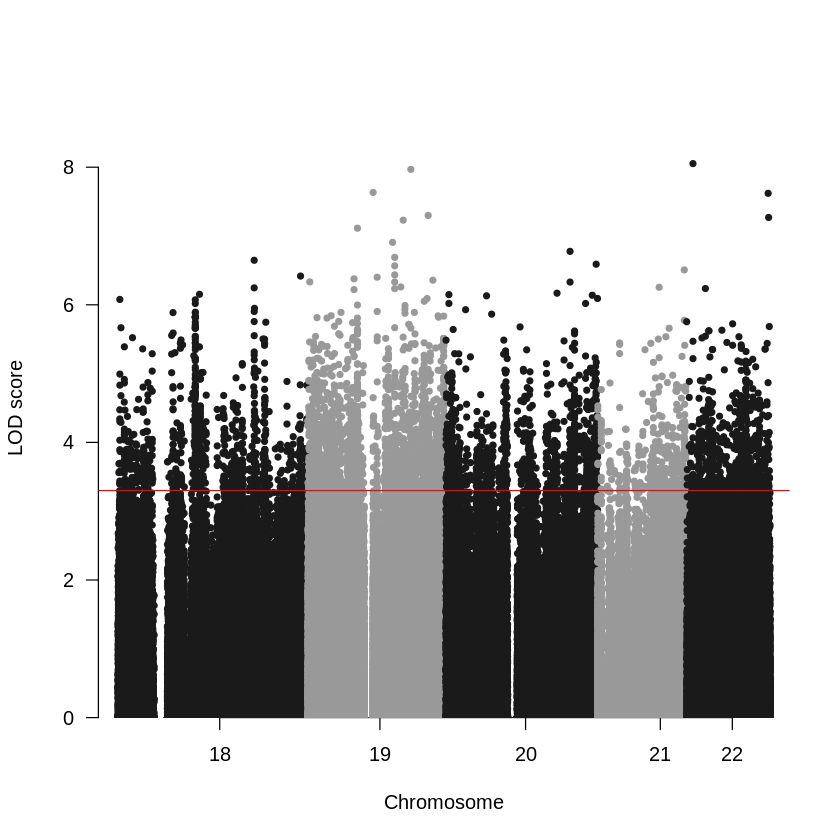

In [ ]:
manhattan(grid_res, chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score")

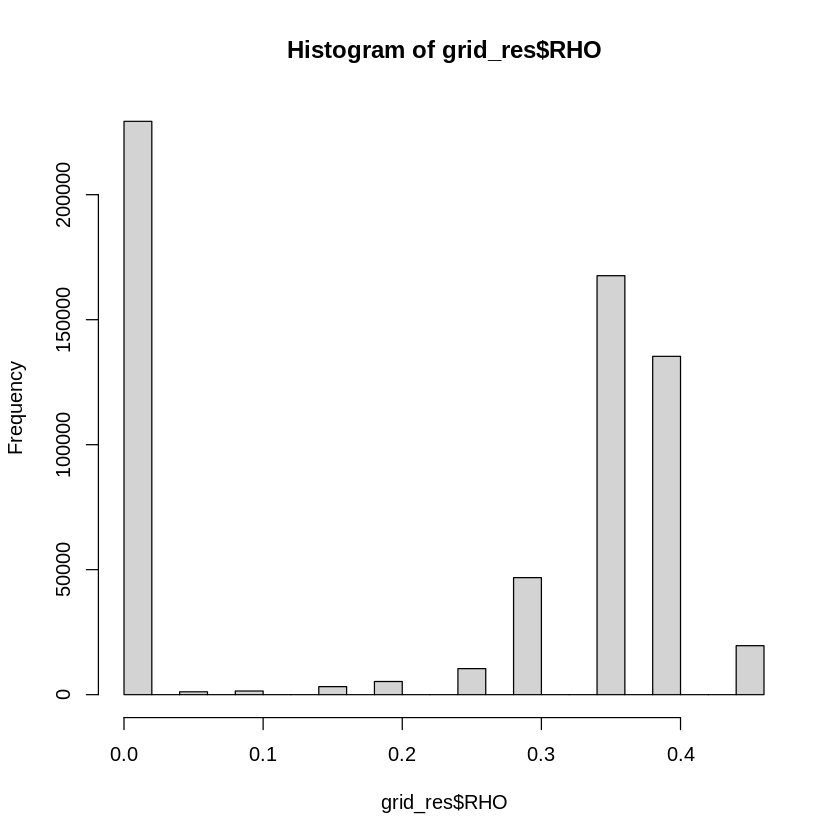

In [ ]:
hist(grid_res$RHO)

In [ ]:
sum(grid_res$RHO<0.1)

[1] 230489

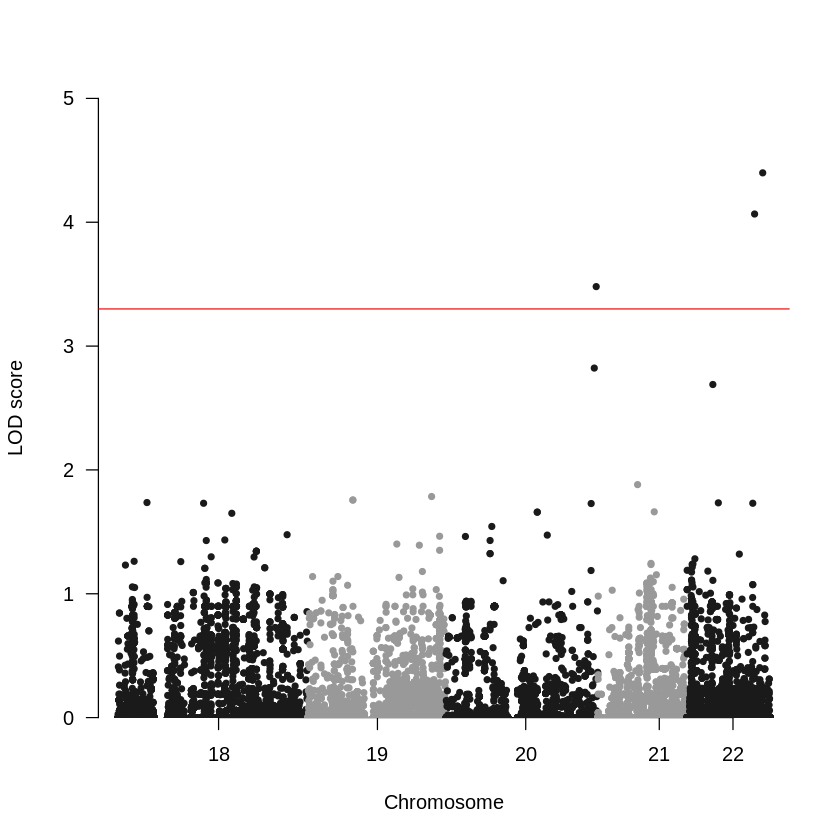

In [ ]:
manhattan(grid_res[grid_res$RHO<0.1,], chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score")

In [ ]:
grid_res[grid_res$RHO<0.1 & grid_res$LOD>3.3,]

,CHR,POS,A0,A1,SNP,LOD,RHO
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
444057,20,63571534,A,G,chr20:63571534:A:G,3.480287,0.05
602371,22,44263080,T,TTTCTTTC,chr22:44263080:T:TTTCTTTC,4.066467,0.05
611181,22,47697736,A,C,chr22:47697736:A:C,4.398866,0.05


### Haplotypes with vs without imputation

### LOD vs HLOD